In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras


In [2]:
features = pd.read_csv('W_features.csv')
sample = pd.read_csv('W_sample_submission.csv')
store = pd.read_csv('W_store.csv')

In [3]:
df = pd.merge(pd.merge(features,sample,on='index'),store,on='index')

In [4]:
df1 = df.drop(['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'],axis=1)

In [5]:
df2 = df1.drop(['Unnamed: 0_x', 'Unnamed: 0_y',	'Unnamed: 0'],axis=1)

In [6]:
df2

,index,Store_x,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Id,Weekly_Sales,Store_y,Type,Size
0,0,1,2010-02-05,42.31,2.572,211.096358,8.106,0,1_1_2012-11-02,0,1,A,151315
1,1,1,2010-02-12,38.51,2.548,211.242170,8.106,1,1_1_2012-11-09,0,2,A,202307
2,2,1,2010-02-19,39.93,2.514,211.289143,8.106,0,1_1_2012-11-16,0,3,B,37392
3,3,1,2010-02-26,46.63,2.561,211.319643,8.106,0,1_1_2012-11-23,0,4,A,205863
4,4,1,2010-03-05,46.50,2.625,211.350143,8.106,0,1_1_2012-11-30,0,5,B,34875
5,5,1,2010-03-12,57.79,2.667,211.380643,8.106,0,1_1_2012-12-07,0,6,A,202505
6,6,1,2010-03-19,54.58,2.720,211.215635,8.106,0,1_1_2012-12-14,0,7,B,70713
7,7,1,2010-03-26,51.45,2.732,211.018042,8.106,0,1_1_2012-12-21,0,8,A,155078
8,8,1,2010-04-02,62.27,2.719,210.820450,7.808,0,1_1_2012-12-28,0,9,B,125833
9,9,1,2010-04-09,65.86,2.770,210.622857,7.808,0,1_1_2013-01-04,0,10,B,126512


In [7]:
df_temp = df2[['Date', 'Temperature']]
df_temp.columns = ['ds','y']
df_fuel = df2[['Date', 'Fuel_Price']]
df_fuel.columns = ['ds','y']
df_cpi = df2[['Date', 'CPI']]
df_cpi.columns = ['ds','y']

In [8]:
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, plot_components_plotly

Importing plotly failed. Interactive plots will not work.


In [18]:
model_temp = Prophet(weekly_seasonality=True)
model_fuel = Prophet(weekly_seasonality=True)
model_cpi = Prophet(weekly_seasonality=True)

In [19]:
model_temp.fit(df_temp)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [20]:
model_fuel.fit(df_fuel)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [21]:
model_cpi.fit(df_cpi)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [22]:
future_temp = model_temp.make_future_dataframe(periods=42)
future_fuel = model_fuel.make_future_dataframe(periods=42)
future_cpi = model_cpi.make_future_dataframe(periods=42)

In [23]:
forecast_temp = model_temp.predict(future_temp)
forecast_fuel = model_fuel.predict(future_fuel)
forecast_cpi = model_cpi.predict(future_cpi)

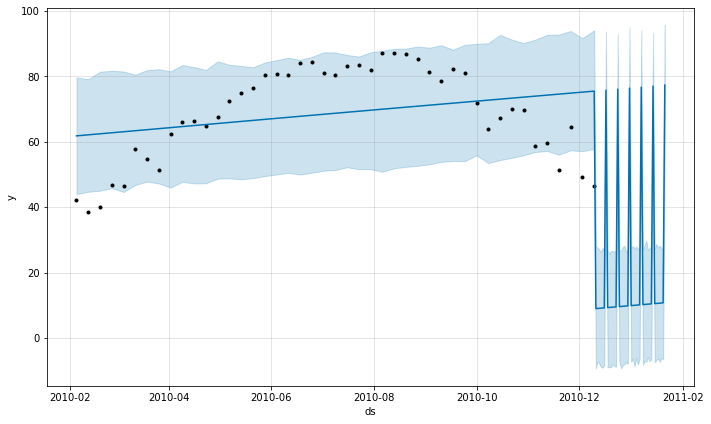

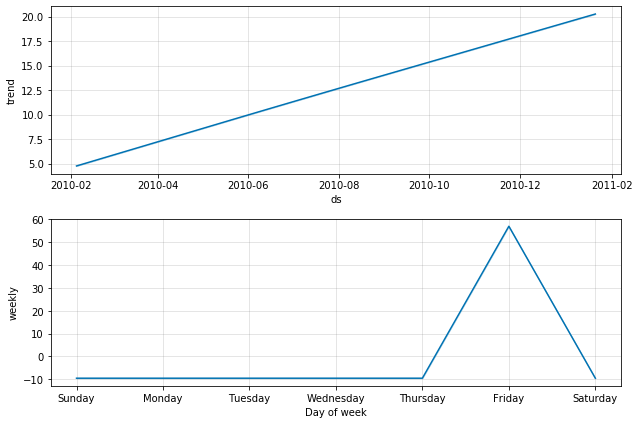

In [24]:
fig_temp = model_temp.plot(forecast_temp)
fig_temp2 = model_temp.plot_components(forecast_temp)

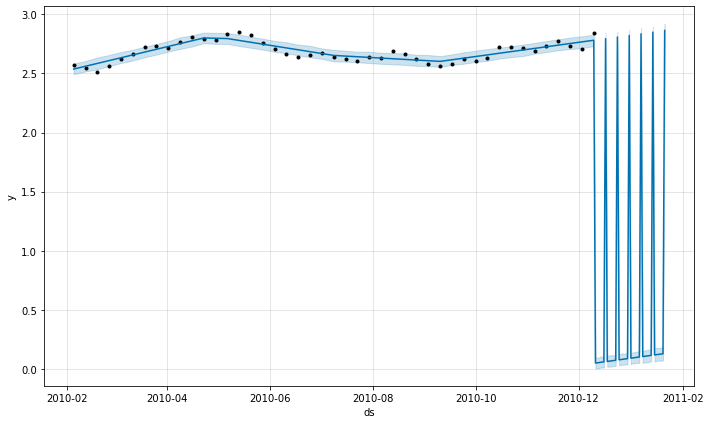

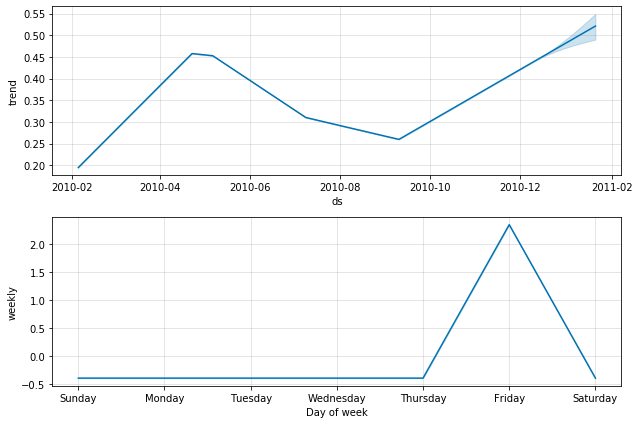

In [25]:
fig_fuel = model_fuel.plot(forecast_fuel)
fig_fuel2 = model_fuel.plot_components(forecast_fuel)

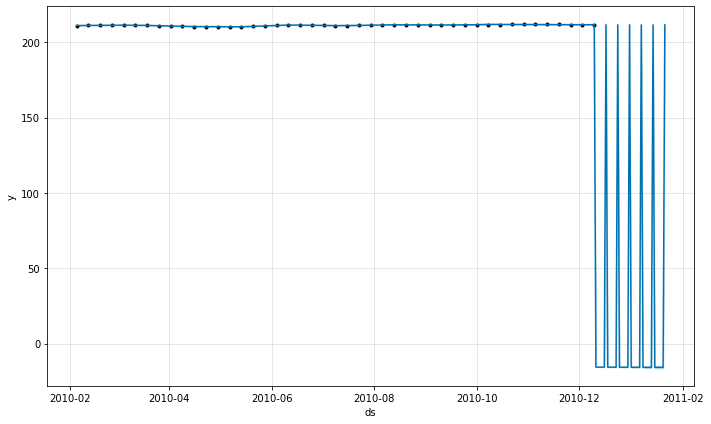

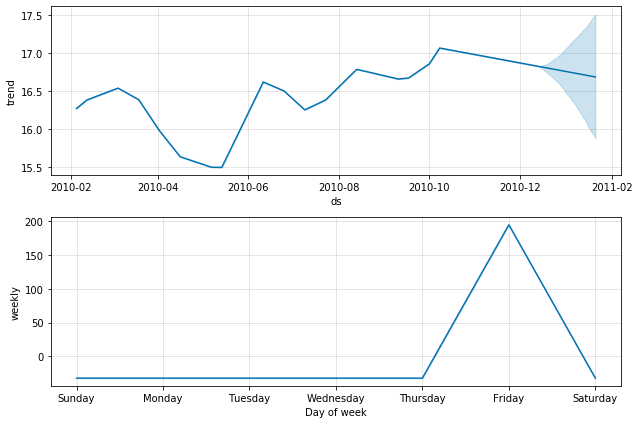

In [26]:
fig_cpi = model_cpi.plot(forecast_cpi)
fig_cpi2 = model_cpi.plot_components(forecast_cpi)